In [347]:
from scipy.io import loadmat
import numpy as np


from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# 1. Implement SVM method

In [227]:
# ment to work with only 1 instance at a time, not with batches
def slack_variable(w, x, y):
    #print(f"weights shape: {w.shape}")
    #print(f"x shape: {x.shape}")
    #print(f"y shape: {y.shape}")
    values = 1 - y * (np.dot(np.transpose(w),x))
    #print(values)
    values[values<0] = 0 # Convert negatives to 0
    #print(values)
    return(np.sum(values))
    
def loss_function(w, x, y):
    sv = 0
    for x_i, y_i in zip(x,y):
        sv_i = slack_variable(w, x_i, y_i)
        sv += sv_i
    
    cost = (1/2)*np.dot(np.transpose(w), w) + C*sv
    
    return cost

In [228]:
# ment to work with only 1 instance at a time, not with batches
def gradiant_cost(w, x, y):
    #print("inside function: gradiant_cost")
    #print(f"weights shape: {w.shape}")
    #print(f"x shape: {x.shape}")
    #print(f"y shape: {y.shape}")
    
    values = 1 - y * (np.dot(np.transpose(w),x))
    #print(np.dot(np.transpose(w),x))
    #print(y * (np.dot(np.transpose(w),x)))
    #print(values)
    #print()
    
    if(values <= 0):
        return w
    else:
        return w - (C * y * x)

In [304]:
def train_binary_class_SVM(features, labels, C=100, epochs = 1000, learning_rate=0.01, random_weights=False, cost_threshold = 0.001):
    
    if(random_weights):
        weights = np.random.rand(features.shape[-1]) # create the weights at random
    else:
        weights = np.zeros(features.shape[-1]) # create the weights at 0
    #print(f"weights shape: {weights.shape}")
    prev_loss = float("inf")
    # loop the epochs
    for epoch in range(epochs): 
        print(f"epoch {epoch+1} of {epochs}")
        
        # Iterate all the instances and train
        for ind, x in enumerate(features):
            #print(f"weights shape: {weights.shape}")
            #print(f"x shape: {x.shape}")
            #print(f"y shape: {labels[ind].shape}")
            #print()
            descent = gradiant_cost(weights, x, labels[ind])
            #print(ascent)
            weights = weights - (learning_rate * descent)
            #print(weights)
            
            
        # Evaluate Loss Function for each epoch
        current_loss = loss_function(weights, features, labels)
        print(f"Loss: {current_loss}")
        if(abs(prev_loss - current_loss) < cost_threshold * prev_loss):
            # Early stop
            print("Early Stop")
            break
        prev_loss = current_loss
        
        
    return(weights)

In [305]:
def train_multy_class_SVM(features, labels, C=100, epochs = 1000, learning_rate=0.01, random_weights=False, cost_threshold = 0.001):
    # get the list of labels
    set_of_labels = np.unique(labels)
    
    set_of_weights = []
    # build as many SVM as labels
    for lab in set_of_labels:
        print(f"Training SVM for label {lab}")
        # Copy the labels
        sub_set_label = np.copy(labels)
        # Modify them to a binary classification
        sub_set_label[sub_set_label!=lab] = 0
        sub_set_label[sub_set_label==lab] = 1
        
        # train individual binary svm
        weights_i = train_binary_class_SVM(features, sub_set_label, C=C, epochs = epochs, learning_rate=learning_rate, random_weights=random_weights, cost_threshold = cost_threshold)
        set_of_weights.append(weights_i)
    return(set_of_weights)

In [344]:
# make a binary class prediction for a weight and a feature instance
def make_binary_class_prediction(weights, x):
    output = np.dot(np.transpose(weights),x)
    return(output, np.sign(output))

# make a multy class prediction for a set of weights and a feature instance
def make_multy_class_prediction(set_weights, x):
    
    best_prediction_val = -float("inf")
    best_prediction_class = -1
    for pos, weights in enumerate(set_weights):
        # make individual prediction
        pred_val, pred_class = make_binary_class_prediction(weights, x)
        if(pred_val > best_prediction_val):
            best_prediction_val = pred_val
            best_prediction_class = pos+1
    return(best_prediction_class)

# Make predictions for all test set
def make_predictions(test_features, weights):
    predictions = []
    for x in test_features:
        pred = make_multy_class_prediction(weights,x)
        predictions.append(pred)
    return(predictions)

# 2. Load train and test mat files, perform SVM and report acuracy on the test dataset

In [349]:
# Open the model
train_dataset = loadmat('../Project 3_DecisionTrees/train.mat')

train_dataset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Oct 12 22:10:47 2022',
 '__version__': '1.0',
 '__globals__': [],
 'features': array([[-1.9087052e-01, -8.1624687e-01, -1.6324869e-01, ...,
         -1.7326276e-01, -3.3678705e-01,  1.4531960e+00],
        [-1.0689135e+00, -6.6361743e-01, -5.4769421e-01, ...,
          2.3691764e-01, -7.9150289e-01,  1.6607733e+00],
        [ 2.1004608e-01, -5.4553837e-01, -2.3526147e-01, ...,
          2.2105977e-01,  3.2690910e-01, -5.7891858e-01],
        ...,
        [ 3.0305445e-02,  1.2849410e-01, -3.2814008e-01, ...,
         -3.9511231e-01, -2.8412789e-04, -1.9695227e-01],
        [ 4.0498897e-02,  3.7712151e-01, -3.0760404e-01, ...,
         -4.9570936e-01, -7.3815003e-02, -1.6422004e-02],
        [ 1.5795332e-01,  5.9384692e-01, -1.9313660e-01, ...,
         -1.9358669e-01, -4.4733964e-02, -3.8367152e-01]], dtype=float32),
 'labels': array([[ 1],
        [ 1],
        [ 1],
        ...,
        [10],
        [10],
       

In [350]:
train_features = train_dataset['features']
train_labels = train_dataset['labels']
print(train_features.shape)
print(train_labels.shape)

(1123, 1000)
(1123, 1)


In [351]:

# Open the model
test_dataset = loadmat('../Project 3_DecisionTrees/test.mat')

test_dataset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sun Oct 16 11:43:39 2022',
 '__version__': '1.0',
 '__globals__': [],
 'features': array([[-0.1810047 , -0.3263064 ,  0.09900231, ...,  0.0896374 ,
          0.30170187, -0.315777  ],
        [-0.08604874, -0.24425426,  0.03491393, ...,  0.15105137,
          0.14930305, -0.50344443],
        [-0.02536274, -0.22994491,  0.0929625 , ...,  0.21274611,
          0.08147568, -0.5320467 ],
        ...,
        [-0.19452816,  0.09794576, -0.37737143, ..., -0.465474  ,
          0.04289951, -0.2871586 ],
        [-0.04896154,  0.2931249 , -0.28049102, ..., -0.2639083 ,
         -0.09265084, -0.3752439 ],
        [-0.09236805,  0.1781122 , -0.40881082, ..., -0.36157244,
          0.17647949, -0.36177444]], dtype=float32),
 'labels': array([[ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
  

In [352]:
test_features = test_dataset['features']
test_labels = test_dataset['labels']
print(test_features.shape)
print(test_labels.shape)

(958, 1000)
(958, 1)


In [353]:
train_features.shape

(1123, 1000)

In [354]:
# Before training add a column of 1 to the features, to represent the Bias
train_features2 = np.append(train_features,np.ones([len(train_features),1]),1)
test_features2 = np.append(test_features,np.ones([len(test_features),1]),1)

### Train Model

In [382]:
epochs = 1000
cost_threshold = 0.001
C = 1000 
learning_rate = 0.0001

In [383]:
weights = train_multy_class_SVM(train_features2, 
                                train_labels, 
                                C=C, 
                                epochs = epochs, 
                                learning_rate=learning_rate, 
                                random_weights=False, 
                                cost_threshold = cost_threshold)
weights

Training SVM for label 1
epoch 1 of 1000
Loss: 972004.9348178242
epoch 2 of 1000
Loss: 972003.9420643247
Early Stop
Training SVM for label 2
epoch 1 of 1000
Loss: 1013003.416249116
epoch 2 of 1000
Loss: 1013002.7289910681
Early Stop
Training SVM for label 3
epoch 1 of 1000
Loss: 1023002.4372186173
epoch 2 of 1000
Loss: 1023052.5610223442
Early Stop
Training SVM for label 4
epoch 1 of 1000
Loss: 985004.9528143911
epoch 2 of 1000
Loss: 985003.9564404632
Early Stop
Training SVM for label 5
epoch 1 of 1000
Loss: 1038003.4309210915
epoch 2 of 1000
Loss: 1038002.740711434
Early Stop
Training SVM for label 6
epoch 1 of 1000
Loss: 995002.9005201774
epoch 2 of 1000
Loss: 995002.3170130128
Early Stop
Training SVM for label 7
epoch 1 of 1000
Loss: 990002.4385820677
epoch 2 of 1000
Loss: 990001.9480045089
Early Stop
Training SVM for label 8
epoch 1 of 1000
Loss: 1029002.751637747
epoch 2 of 1000
Loss: 1029002.1980817497
Early Stop
Training SVM for label 9
epoch 1 of 1000
Loss: 1036006.1429743335
e

[array([-0.01524877, -0.0652105 , -0.01304205, ..., -0.02690614,
         0.11609679,  0.07989066]),
 array([ 0.0376436 , -0.01963927,  0.02267602, ..., -0.0081206 ,
         0.08665125,  0.08110623]),
 array([-0.04660147, -0.07088549, -0.04813311, ...,  0.04813542,
        -0.06521593,  0.08200336]),
 array([-0.013726  ,  0.00038356,  0.02528602, ..., -0.03585595,
        -0.007419  ,  0.08282755]),
 array([-0.02265487,  0.02638555,  0.02098004, ..., -0.02013181,
         0.12322796,  0.08397855]),
 array([ 0.05052795, -0.04397801,  0.00945192, ..., -0.01772548,
        -0.02648426,  0.08469545]),
 array([ 0.01111437, -0.00727517,  0.00234771, ..., -0.01553778,
        -0.0355108 ,  0.08578657]),
 array([-0.04564883, -0.01544238, -0.02912372, ...,  0.0928972 ,
        -0.05181153,  0.08693521]),
 array([-0.00048813, -0.10142222, -0.05146584, ...,  0.06029774,
         0.06047231,  0.0877563 ]),
 array([ 0.0002857 ,  0.03853864, -0.00880452, ..., -0.01429681,
        -0.06989129,  0.08

In [384]:
print(len(weights))
for i in weights:
    print(i.shape)

10
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)
(1001,)


### Make Prediction

In [385]:
predictions = make_predictions(test_features2, weights)
np.array(predictions)

array([ 4,  1,  1,  4,  4,  4,  1,  1,  1,  4,  1,  1,  4,  4,  1,  1,  1,
        1,  1,  1,  4,  1,  1,  4,  1,  1,  1,  4,  1,  1,  1,  1,  1,  4,
        4,  4,  4,  4,  1,  4,  4,  4,  4,  1,  1,  4,  1,  1,  4,  6,  4,
        1,  4,  1,  1,  4,  4,  1,  4,  1,  4,  1,  4,  4,  1,  1,  1,  1,
        1,  4,  4,  1,  1,  4,  4,  4,  4,  4,  6,  4,  4,  4,  4,  4,  4,
        1,  1,  1,  1,  4,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  6,  5,  6,  3,  3,  5,  6,  6,  6,  3,
        3,  3,  6,  3,  6,  6,  6,  6,  6,  3,  3,  6,  6,  6,  5,  3,  5,
        3,  5,  3,  3,  3,  3,  6,  6,  3,  6,  6,  6,  6,  3,  6,  6,  3,
        6,  5,  3,  3,  3

In [386]:
np.moveaxis(test_labels, 0, -1)[0]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [387]:
# Calculate Accuracy
acc = accuracy_score(np.moveaxis(test_labels, 0, -1)[0], predictions)

print("Accuracy: ", acc*100, "%")

Accuracy:  81.83716075156576 %


# 3. Reduce the dimensionality of features using PCA to low dimensions (e.g., 10, 3 ) and report the accuracy of the test datasets

In [388]:
pca = PCA(n_components=10)
pca.fit(train_features)

PCA(n_components=10)

In [389]:
pca_train_features = pca.transform(train_features)
pca_test_features = pca.transform(test_features)

In [390]:
# Before training add a column of 1 to the features, to represent the Bias
pca_train_features2 = np.append(pca_train_features,np.ones([len(pca_train_features),1]),1)
pca_test_features2 = np.append(pca_test_features,np.ones([len(pca_test_features),1]),1)

In [391]:
weights_pca = train_multy_class_SVM(pca_train_features2, 
                                train_labels, 
                                C=C, 
                                epochs = epochs, 
                                learning_rate=learning_rate, 
                                random_weights=False, 
                                cost_threshold = cost_threshold)
weights_pca

Training SVM for label 1
epoch 1 of 1000
Loss: 984145.8786216797
epoch 2 of 1000
Loss: 972002.7403844937
epoch 3 of 1000
Loss: 972002.1890923503
Early Stop
Training SVM for label 2
epoch 1 of 1000
Loss: 1013002.487048003
epoch 2 of 1000
Loss: 1013001.9867203928
Early Stop
Training SVM for label 3
epoch 1 of 1000
Loss: 1023000.8091604572
epoch 2 of 1000
Loss: 1023000.6463789921
Early Stop
Training SVM for label 4
epoch 1 of 1000
Loss: 985003.7162349109
epoch 2 of 1000
Loss: 985002.9686277359
Early Stop
Training SVM for label 5
epoch 1 of 1000
Loss: 1038001.4221671461
epoch 2 of 1000
Loss: 1038001.1360651132
Early Stop
Training SVM for label 6
epoch 1 of 1000
Loss: 995001.20659116
epoch 2 of 1000
Loss: 995000.963857256
Early Stop
Training SVM for label 7
epoch 1 of 1000
Loss: 990001.1485065494
epoch 2 of 1000
Loss: 990000.9174577171
Early Stop
Training SVM for label 8
epoch 1 of 1000
Loss: 1029001.3788445882
epoch 2 of 1000
Loss: 1029001.1014578965
Early Stop
Training SVM for label 9
epo

[array([ 1.00405654,  0.67626818,  0.46836403,  1.04966401,  0.02865188,
        -0.20368367,  0.18109571,  0.50182341,  1.03810232, -0.22774691,
         0.36756182]),
 array([ 1.28059976, -0.39457658,  1.31786555, -0.43478263,  0.16888735,
        -0.33494393, -0.27514   , -0.08520045, -0.05252612,  0.13784081,
         0.08110623]),
 array([-0.22967677, -0.02669187,  0.20012008, -0.16387811, -0.09327938,
         0.9307648 ,  0.15777018,  0.21738067, -0.09854441, -0.45692947,
         0.08200336]),
 array([-1.55953617,  1.19796244,  0.56389737,  0.21180519,  0.00265986,
        -0.41430604, -0.64232453,  0.59880442,  0.80685653, -0.29292753,
         0.16588736]),
 array([-1.13461748, -0.245799  ,  0.11695669,  0.02618318, -0.4686306 ,
        -0.26611604,  0.27117631, -0.33050566, -0.26164724,  0.60106339,
         0.08397855]),
 array([-1.04818018, -0.5843308 ,  0.2878451 ,  0.06790593, -0.1399733 ,
         0.27445623, -0.32151536, -0.30132233, -0.30449378, -0.10558657,
         

In [392]:
print(len(weights_pca))
for i in weights_pca:
    print(i.shape)

10
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)


In [393]:
predictions_pca = make_predictions(pca_test_features2, weights_pca)
np.array(predictions_pca)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  5,  3,  3,  3,  5,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,  6,  6,  3,
        3,  3,  3,  3,  3

In [394]:
np.moveaxis(test_labels, 0, -1)[0]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [395]:
# Calculate Accuracy
acc_pca = accuracy_score(np.moveaxis(test_labels, 0, -1)[0], predictions_pca)

print("Accuracy: ", acc_pca*100, "%")

Accuracy:  92.48434237995825 %


# 4. Compare results with KNN, Decision Tree model

Accuracy of KNN on 1000 features:
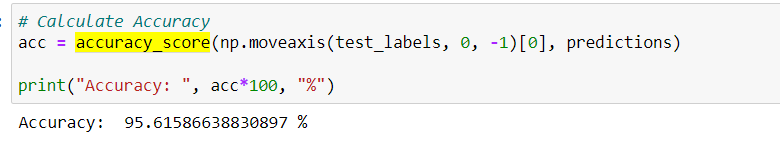

Accuracy of Decision Tree on 1000 features:
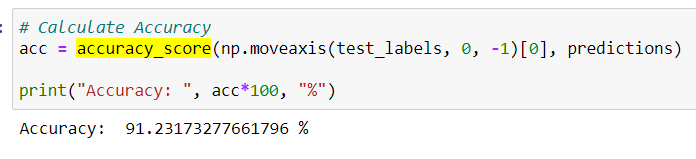

Accuracy of KNN on 10 features, using PCA
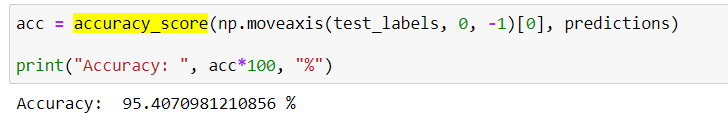
Accuracy of Decision Tree on 10 features:
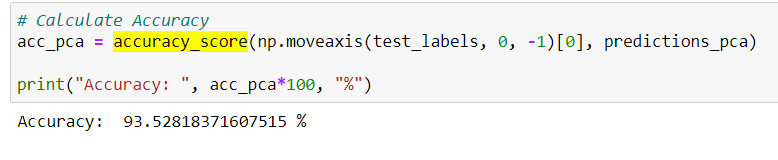

The accuracy of the SVM using the 1000 features is 81.83% while the KNN is 95.61% and Decision Trees 91.23%. And if we use PCA reducing the dimensionality to 10 features, the SVM accuracy is 92.48% while the KNN was 95.40% and Decision Tree 93.52%. By reducing dimensionality, the difference in accuracy got reduce. In the case of the SVM the accuracy improves substantially